<a href="https://colab.research.google.com/github/DaruHashida/MyPHP/blob/main/%22digits_recognition_exercise_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

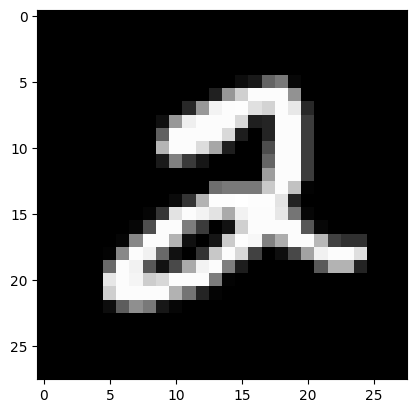

In [41]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

##LET'S CREATE A DATASET
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok = True)

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH/FILENAME).exists():
  content = requests.get(URL + FILENAME).content
  (PATH/FILENAME).open("wb").write(content)

import pickle
import gzip
with gzip.open((PATH/FILENAME).as_posix(),"rb") as f:
  ((X_train, y_train),(X_test, y_test), _ )= pickle.load(f, encoding="latin-1")

import matplotlib.pyplot as plt
import numpy as np
plt.imshow(X_train[5].reshape((28,28)),cmap="gray")

In [2]:
X_train, y_train, X_test, y_test = map (torch.tensor, (X_train, y_train, X_test, y_test))

In [3]:
#Let's build the model

class PicturesRecognitionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(784, 10,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.zeros(10,
                                            requires_grad=True,
                                            dtype=torch.float))
  def forward(self,xb: torch.Tensor) -> torch.Tensor:
    return xb @ self.weights + self.bias

In [4]:
model = PicturesRecognitionModel()
model.to(device)
model.state_dict()

OrderedDict([('weights',
              tensor([[ 1.3059, -1.1144, -0.1988,  ..., -0.3084,  1.1563,  1.0588],
                      [ 0.9666, -0.0726,  0.6398,  ..., -0.3003,  2.2224, -1.0997],
                      [-1.1781,  1.3730,  0.6715,  ..., -0.8956,  0.1486, -0.9591],
                      ...,
                      [ 0.0307, -0.6940, -0.3698,  ...,  0.0990, -0.3047,  1.8062],
                      [-0.1713, -0.9036,  0.1490,  ..., -1.1436,  0.8607, -1.0654],
                      [ 1.9864,  1.5283,  2.3416,  ...,  1.3450, -1.9949,  0.3544]],
                     device='cuda:0')),
             ('bias',
              tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0'))])

In [5]:
#Create loss function
##loss_fn = nn.NLLLoss()
# def nll(input, target):
#     return -input[range(target.shape[0]), target].mean()
#loss_fn = nll
import torch.nn.functional as F
loss_fn = F.cross_entropy
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.5)

In [6]:
#Saving images count to variable
n = X_train.shape[0]
#Saving batch size to variable
batch = 64
X_test.shape

torch.Size([10000, 784])

In [7]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [8]:
epochs = 200
#Removing data on device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
#Training loop

for epoch in range(epochs):
  for i in range((n - 1)// batch + 1):
    model.train()
    start_i = i*batch
    end_i = start_i+batch
    Xb = X_train[start_i:end_i]
    yb = y_train[start_i:end_i]

    y_pred = model(Xb)
    loss = loss_fn(y_pred, yb)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Testing loop

    model.eval()
    with torch.inference_mode():
      start_i_test = start_i//5
      end_i_test = end_i//5
      Xb_test = X_test[start_i_test: end_i_test]
      yb_test = y_test[start_i_test: end_i_test]
      test_pred = model(Xb_test)
      test_accuracy = accuracy(test_pred,yb_test)
      main_accuracy = accuracy(y_pred,yb)
      loss_value = loss_fn(y_pred,yb)
  if epoch % 10 == 0:
    print(f"Epoch:{epoch}| Loss: {loss_value} | Test_accuracy:{test_accuracy} | Accuracy: {main_accuracy}")

Epoch:0| Loss: 1.0014623403549194 | Test_accuracy:0.75 | Accuracy: 0.6875
Epoch:10| Loss: 0.17034205794334412 | Test_accuracy:1.0 | Accuracy: 0.9375
Epoch:20| Loss: 0.1333320140838623 | Test_accuracy:1.0 | Accuracy: 0.9375
Epoch:30| Loss: 0.12023746222257614 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:40| Loss: 0.11174559593200684 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:50| Loss: 0.10556905716657639 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:60| Loss: 0.10083410888910294 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:70| Loss: 0.09708678722381592 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:80| Loss: 0.09405438601970673 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:90| Loss: 0.0915522426366806 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:100| Loss: 0.08945208042860031 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:110| Loss: 0.08766122162342072 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:120| Loss: 0.08611347526311874 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:130| Loss: 0.08475945144891739 | Test_accuracy:1.

In [9]:
with torch.inference_mode():
  y_preds = model(X_test)

In [10]:
xb = X_train[:batch]
yb = y_train[:batch]
loss_fn(model(xb), yb)



tensor(0.1238, device='cuda:0', grad_fn=<NllLossBackward0>)

In [11]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = "01_pytorch_homework.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_homework.pth')

In [12]:
torch.save(f=MODEL_SAVE_PATH, obj = model.state_dict())

In [118]:
#PREPARE OWN PICTURE
from PIL import Image, ImageFilter


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixelsn
    img = im.resize((28, 28), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
    newImage.paste(img)
    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = np.array([(255 - x) * 1.0 / 255.0 for x in tv])
    plt.imshow(tva.reshape((28,28)),cmap="gray")
    print(tva)
    return tva

In [81]:
X_train[0].dtype

dtype('float32')

<ipython-input-118-674d87cb558a>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = im.resize((28, 28), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)


[0.01568627 0.01568627 0.01568627 0.01568627 0.01568627 0.01568627
 0.01568627 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471
 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471
 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471
 0.01176471 0.01176471 0.01176471 0.01176471 0.01568627 0.01568627
 0.01568627 0.01568627 0.01568627 0.00784314 0.01176471 0.01176471
 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471
 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471
 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471
 0.01176471 0.01176471 0.01568627 0.01568627 0.01568627 0.01568627
 0.01568627 0.01568627 0.01176471 0.01176471 0.01176471 0.01176471
 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471
 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471
 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471
 0.01568627 0.01568627 0.01568627 0.01568627 0.01568627 0.0156

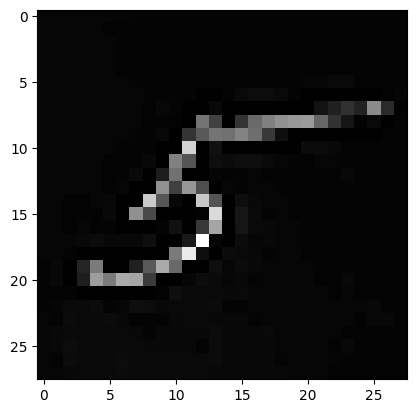

In [123]:
x=imageprepare('./picture3.jpg')#file path here
print(len(x))# mnist IMAGES are 28x28=784 pixels

In [124]:
data = x
prepared_data = torch.tensor(data, device = device,dtype=torch.float32)
with torch.inference_mode():
  res = model(prepared_data)
result = int(res.argmax())
print(f"Это цифра: {result}")
print(res)

Это цифра: 5
tensor([ 1.2630, -0.3496,  2.9589,  2.1462, -1.3709,  4.8028, -3.0959,  0.1007,
         0.1420, -0.2957], device='cuda:0')


In [98]:
prepared_data

tensor([[152., 148., 154., 151., 150., 153., 148., 152., 149., 146., 146., 147.,
         147., 152., 151., 149., 152., 147., 150., 151., 150., 153., 152., 157.,
         160., 159., 158., 161., 150., 152., 151., 149., 151., 151., 148., 144.,
         140., 140., 142., 151., 141., 147., 146., 147., 148., 148., 150., 147.,
         148., 152., 147., 151., 158., 161., 162., 161., 148., 150., 154., 153.,
         153., 147., 145., 143., 147., 144., 145., 145., 145., 144., 144., 148.,
         148., 152., 150., 146., 142., 149., 153., 159., 154., 157., 155., 161.,
         137., 144., 146., 151., 150., 150., 149., 150., 139., 142., 141., 141.,
         143., 141., 143., 142., 146., 148., 149., 139., 149., 151., 150., 150.,
         151., 151., 157., 159., 129., 128., 145., 151., 152., 152., 151., 154.,
         149., 137., 147., 143., 139., 144., 144., 145., 145., 151., 135.,  76.,
         152., 151., 149., 151., 152., 155., 154., 156., 131., 130., 131., 133.,
         141., 146., 148., 1

In [ ]:
plot_predictions(predictions=y_preds.cpu())

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = "01_pytorch_homework.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

In [ ]:
torch.save(f=MODEL_SAVE_PATH, obj = model.state_dict())

In [ ]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model = loaded_model.to(device)

model.state_dict()

In [ ]:
loaded_model.state_dict()